In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)

df = pd.read_csv('Tetuan City power consumption.csv', sep=",", header=0)

display(df.head(10))

# rename DateTime column to date
df = df.rename(columns={'DateTime': 'date'})


# Date Time: Each ten minutes.
# Temperature: Weather Temperature of Tetouan city.
# Humidity: Weather Humidity of Tetouan city.
# Wind Speed of Tetouan city.
# general diffuse flows
# diffuse flows
# power consumption of zone 1 of Tetouan city.
# power consumption of zone 2 of Tetouan city.
# power consumption of zone 3 of Tetouan city. 


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559000,73.800000,0.083000,0.051000,0.119000,34055.696200,16128.875380,20240.963860
1,1/1/2017 0:10,6.414000,74.500000,0.083000,0.070000,0.085000,29814.683540,19375.075990,20131.084340
2,1/1/2017 0:20,6.313000,74.500000,0.080000,0.062000,0.100000,29128.101270,19006.686930,19668.433730
3,1/1/2017 0:30,6.121000,75.000000,0.083000,0.091000,0.096000,28228.860760,18361.094220,18899.277110
4,1/1/2017 0:40,5.921000,75.700000,0.081000,0.048000,0.085000,27335.696200,17872.340430,18442.409640
5,1/1/2017 0:50,5.853000,76.900000,0.081000,0.059000,0.108000,26624.810130,17416.413370,18130.120480
6,1/1/2017 1:00,5.641000,77.700000,0.080000,0.048000,0.096000,25998.987340,16993.313070,17945.060240
7,1/1/2017 1:10,5.496000,78.200000,0.085000,0.055000,0.093000,25446.075950,16661.398180,17459.277110
8,1/1/2017 1:20,5.678000,78.100000,0.081000,0.066000,0.141000,24777.721520,16227.355620,17025.542170
9,1/1/2017 1:30,5.491000,77.300000,0.082000,0.062000,0.111000,24279.493670,15939.209730,16794.216870


### Vamos tentar prever a quantidade de consumo de energia na cidade de Tetuan

primeiramente tratando os dados

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


podemos observar que nao existem dados nao nulos/dados faltando

In [32]:
display(df.describe())

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


Colocando a coluna Date como data

In [33]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')

print(df['date'])

0       2017-01-01 00:00:00
1       2017-01-01 00:10:00
2       2017-01-01 00:20:00
3       2017-01-01 00:30:00
4       2017-01-01 00:40:00
                ...        
52411   2017-12-30 23:10:00
52412   2017-12-30 23:20:00
52413   2017-12-30 23:30:00
52414   2017-12-30 23:40:00
52415   2017-12-30 23:50:00
Name: date, Length: 52416, dtype: datetime64[ns]


##### de uma forma geral podemos ver que os dados não apresentam valores estranhos, não existem valores zerados/negativos
##### porem os valroes de Wind Speed,general diffuse flows e diffuse flows variam muito de 50% ate 75% e nao sei porque 
##### vamos montar os gráficos para investigar mais

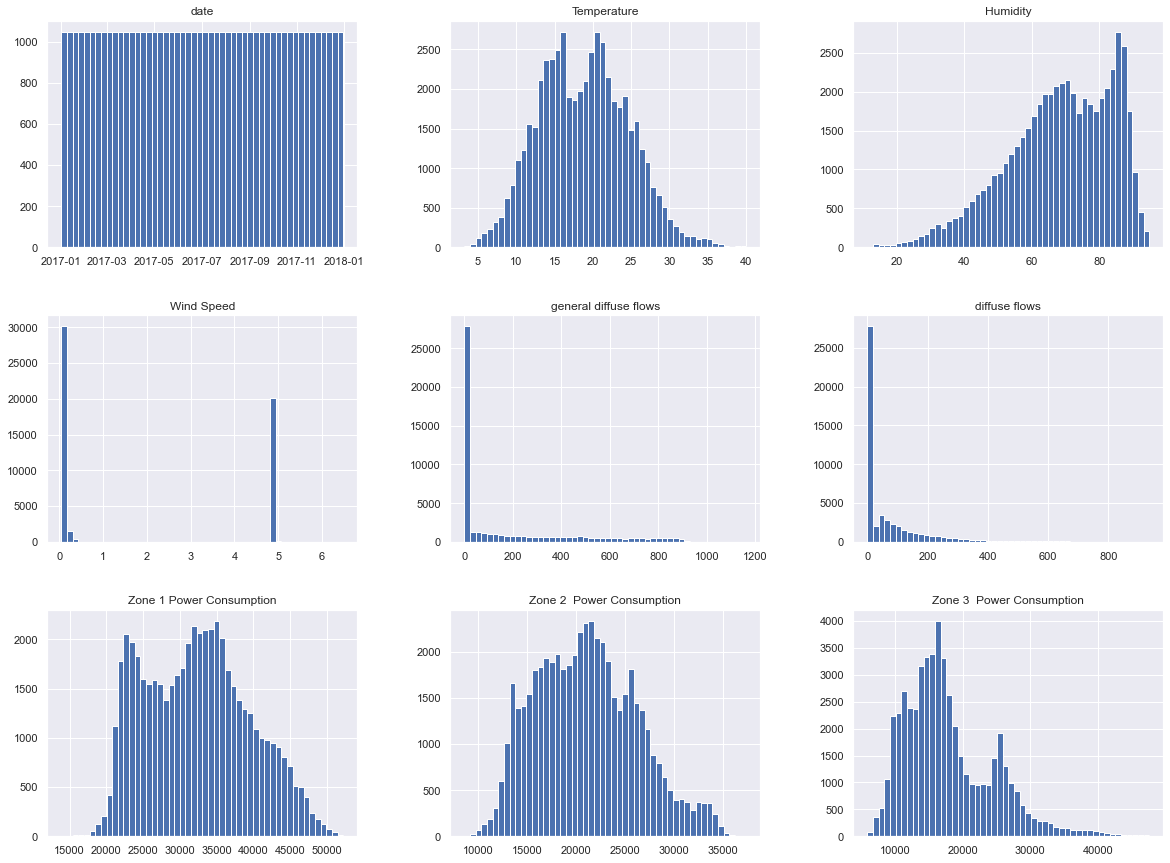

In [34]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

regiao que mais consome?

##### BoxPlots

<AxesSubplot:>

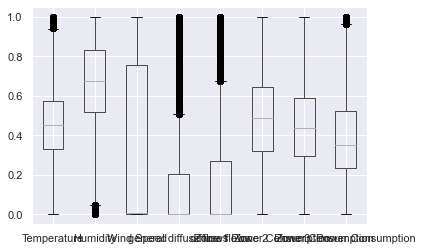

In [35]:
from pydoc import describe
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from numpy import percentile

df_data = df['date']

df = df.drop(['date'], axis=1)


# removendo outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

scaled_df.boxplot(
    column=['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows','Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption'])


Matriz de correlação

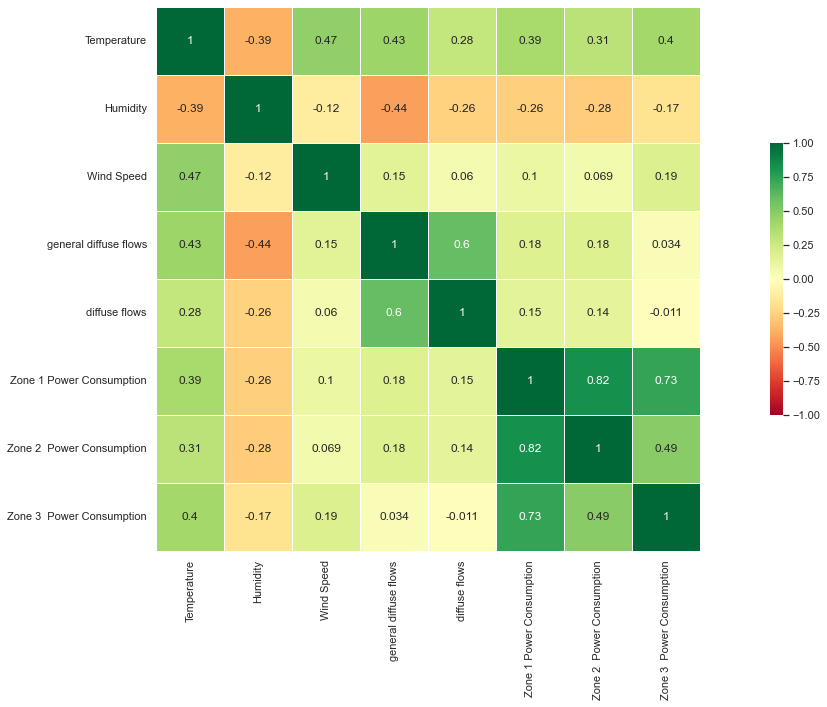

In [36]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 10))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='RdYlGn', vmax=1,
        vmin=-1, center=0, square=True,
        linewidth=.5, cbar_kws={"shrink":.5})

plt.show()

Aqui podemos observar alguns fatores que fazem sentido, como a alta correlação entre o consumo nas zonas, assim como general diffuse flows e diffuse flows

time series /  juntar as zonas? 

Analise de consumo de energia por dia

In [39]:
dfTest = df
pc = dfTest.groupby("date")["Zone 1 Power Consumption"].mean().rename("Power Consumption per day")
pc.plot(figsize=(20,10), linewidth=5, fontsize=20)

KeyError: 'DateTime'

#### Regressao Linear

In [40]:
powerC = {}

powerC["features"] = scaled_df[['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows']]
powerC["target"] = scaled_df['Zone 1 Power Consumption']

Mean squared error: 0.033026
Mean absolute error: 0.149923
Root Mean squared error: 0.181730
R2 score: 0.170790
Coefficients: 
 [ 0.4541974  -0.13282146 -0.04921515 -0.04528436  0.03409461]
Intercept: 
 0.3898258861146399
Score: 
 0.17078964996346901
scores: 
 [-0.03332348 -0.03207558 -0.0343807  -0.03347116 -0.03334109 -0.03197963
 -0.03274525]
scores mean:  -0.033045270364896594
scores std:  0.0007833586186617847


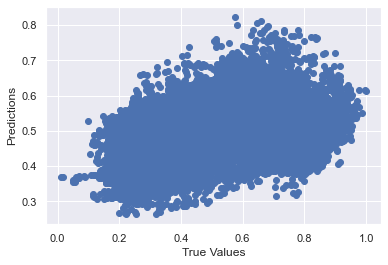

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(powerC['features'], powerC['target'], test_size=0.3)

# train the model
model = LinearRegression()
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))


print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('Score: \n', model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_test, y_test, cv=7, scoring='neg_mean_squared_error')
print('scores: \n', scores)

print('scores mean: ', scores.mean())
print('scores std: ', scores.std())

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### Utilizando outros modelos 

In [55]:
def norma_l2(X):
    X = X.astype(float)
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

#### Lasso Regression

In [56]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)
ls_scores = cross_val_score(ls, norma_l2(powerC["features"]), powerC["target"], cv=7, error_score="raise")

print('ls score: ', ls_scores.mean())


ls score:  -0.08117494764114329


#### Ridge Regression

In [57]:
from sklearn.linear_model import Ridge


rg = Ridge(alpha=0.05)
lr = LinearRegression()

lr_scores = cross_val_score(lr, norma_l2(powerC["features"]), powerC["target"], cv=7)
print(lr_scores)
print('lr mean scores: ', lr_scores.mean())

rg_scores = cross_val_score(rg, norma_l2(powerC["features"]), powerC["target"], cv=7)
print('rg mean scores: ', rg_scores.mean())

from sklearn.linear_model import RidgeCV

rg = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025))
rg.fit(norma_l2(powerC["features"]), powerC["target"])

print('rg alpha: ', rg.alpha_)

[0.03271633 0.11489071 0.14655246 0.01148636 0.14032771 0.15274415
 0.11000491]
lr mean scores:  0.10124609043810932
rg mean scores:  0.10525532244708137
rg alpha:  0.00025


#### ElasticNet Regression

In [58]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en = ElasticNet(alpha=0.001, l1_ratio=0.8)
en_scores = cross_val_score(en, norma_l2(powerC["features"]), powerC["target"], cv=10)

print('ElasticNet mean scores: ',en_scores.mean())

encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8))
encv.fit(norma_l2(powerC["features"]), powerC["target"])

print(encv.alpha_)
print(encv.l1_ratio_)

ElasticNet mean scores:  -0.1001628257181344
0.001
0.1


#### Polinomiau Grau 2

score:  0.19867818224587497
Coefficients:  [ 0.         -0.10014153  0.15279507 -0.76319902 -0.1888036   0.2290213
  0.55175027  0.34382169 -0.14251672 -0.36805224 -0.21470077 -0.37271914
 -0.05824977  0.00865613  0.07911266  1.03894405  0.06469557  0.06793007
  0.40077963 -0.10545782 -0.08863578]
Intercept:  0.4216572729028311
Mean squared error: 0.031760
Mean absolute error: 0.144023
Root Mean squared error: 0.178214
R2 score: 0.198678


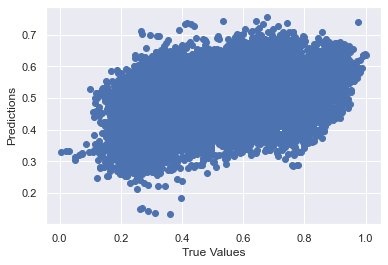

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(powerC['features'], powerC['target'], test_size=0.3)

poly_reg2 = PolynomialFeatures(degree=2)

x_poly = poly_reg2.fit_transform(powerC['features'])

regressor = LinearRegression()

regressor.fit(x_poly, powerC['target'])

y_pred = regressor.predict(poly_reg2.fit_transform(x_test))


print('score: ', regressor.score(poly_reg2.fit_transform(x_test), y_test))

print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


#### Polinomial Grau 4

score:  0.24280415352808937
Coefficients:  [-5.21883663e-14  5.62137992e+00 -5.22523655e-01  1.17314504e+01
 -5.24763877e+00  1.59989484e+00 -1.48449232e+01 -3.13271711e+00
 -8.05466318e+00  2.69468077e+00  4.10525377e+00  5.56666046e-01
 -3.68477238e+01  7.19981244e+00  2.35652685e+00 -9.86329992e+00
 -1.06342655e+01 -2.93267004e+00  1.28351585e+01 -2.88247007e+00
 -5.94719354e+00  1.37891669e+01  7.71763925e+00  1.47509647e+01
 -1.44969311e+00 -3.49313020e+00 -8.50206338e-01  1.47204536e+01
 -1.01598354e+01 -7.16187582e+00 -1.49492237e+01  1.59912263e+00
  6.05471342e+00  4.35437259e-01 -4.34863851e-01  1.90252633e-01
  1.61464845e+00  1.88814061e+01 -4.63568464e+00 -6.03478874e+00
  7.11244669e+01  1.04249880e+01  2.59075232e+00 -3.26738024e+00
 -6.62094707e-01  5.07678361e+00 -2.49324633e+01  2.53840766e+01
  2.26677114e+00  3.46571282e+00 -1.48675183e+00 -7.00274110e-01
 -1.48989748e+01  1.98041994e+00  2.82502620e+00  4.83670919e+00
 -3.51969320e+00 -3.05605556e+00 -7.46896716e+0

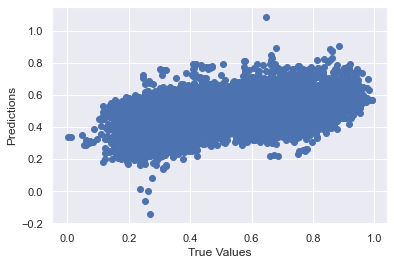

In [61]:
x_train, x_test, y_train, y_test = train_test_split(powerC['features'], powerC['target'], test_size=0.3)

poly_reg2 = PolynomialFeatures(degree=4)

x_poly = poly_reg2.fit_transform(powerC['features'])

regressor = LinearRegression()

regressor.fit(x_poly, powerC['target'])

y_pred = regressor.predict(poly_reg2.fit_transform(x_test))


print('score: ', regressor.score(poly_reg2.fit_transform(x_test), y_test))

print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
